### Required Assignment 5.1: Will the Customer Accept the Coupon?

**Context**

Imagine driving through town and a coupon is delivered to your cell phone for a restaurant near where you are driving. Would you accept that coupon and take a short detour to the restaurant? Would you accept the coupon but use it on a subsequent trip? Would you ignore the coupon entirely? What if the coupon was for a bar instead of a restaurant? What about a coffee house? Would you accept a bar coupon with a minor passenger in the car? What about if it was just you and your partner in the car? Would weather impact the rate of acceptance? What about the time of day?

Obviously, proximity to the business is a factor on whether the coupon is delivered to the driver or not, but what are the factors that determine whether a driver accepts the coupon once it is delivered to them? How would you determine whether a driver is likely to accept a coupon?

**Overview**

The goal of this project is to use what you know about visualizations and probability distributions to distinguish between customers who accepted a driving coupon versus those that did not.

**Data**

This data comes to us from the UCI Machine Learning repository and was collected via a survey on Amazon Mechanical Turk. The survey describes different driving scenarios including the destination, current time, weather, passenger, etc., and then ask the person whether he will accept the coupon if he is the driver. Answers that the user will drive there ‘right away’ or ‘later before the coupon expires’ are labeled as ‘Y = 1’ and answers ‘no, I do not want the coupon’ are labeled as ‘Y = 0’.  There are five different types of coupons -- less expensive restaurants (under \$20), coffee houses, carry out & take away, bar, and more expensive restaurants (\$20 - $50).

**Deliverables**

Your final product should be a brief report that highlights the differences between customers who did and did not accept the coupons.  To explore the data you will utilize your knowledge of plotting, statistical summaries, and visualization using Python. You will publish your findings in a public facing github repository as your first portfolio piece.





### Data Description
Keep in mind that these values mentioned below are average values.

The attributes of this data set include:
1. User attributes
    -  Gender: male, female
    -  Age: below 21, 21 to 25, 26 to 30, etc.
    -  Marital Status: single, married partner, unmarried partner, or widowed
    -  Number of children: 0, 1, or more than 1
    -  Education: high school, bachelors degree, associates degree, or graduate degree
    -  Occupation: architecture & engineering, business & financial, etc.
    -  Annual income: less than \\$12500, \\$12500 - \\$24999, \\$25000 - \\$37499, etc.
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she buys takeaway food: 0, less than 1, 1 to 3, 4 to 8 or greater
    than 8
    -  Number of times that he/she goes to a coffee house: 0, less than 1, 1 to 3, 4 to 8 or
    greater than 8
    -  Number of times that he/she eats at a restaurant with average expense less than \\$20 per
    person: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    -  Number of times that he/she goes to a bar: 0, less than 1, 1 to 3, 4 to 8 or greater than 8
    

2. Contextual attributes
    - Driving destination: home, work, or no urgent destination
    - Location of user, coupon and destination: we provide a map to show the geographical
    location of the user, destination, and the venue, and we mark the distance between each
    two places with time of driving. The user can see whether the venue is in the same
    direction as the destination.
    - Weather: sunny, rainy, or snowy
    - Temperature: 30F, 55F, or 80F
    - Time: 10AM, 2PM, or 6PM
    - Passenger: alone, partner, kid(s), or friend(s)


3. Coupon attributes
    - time before it expires: 2 hours or one day

In [27]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

### Problems

Use the prompts below to get started with your data analysis.  

1. Read in the `coupons.csv` file.




In [28]:
data = pd.read_csv('data/coupons.csv')

In [29]:
data.head()

,destination,passanger,weather,temperature,time,coupon,expiration,gender,age,maritalStatus,...,CoffeeHouse,CarryAway,RestaurantLessThan20,Restaurant20To50,toCoupon_GEQ5min,toCoupon_GEQ15min,toCoupon_GEQ25min,direction_same,direction_opp,Y
0,No Urgent Place,Alone,Sunny,55,2PM,Restaurant(<20),1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,1
1,No Urgent Place,Friend(s),Sunny,80,10AM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,0,0,0,1,0
2,No Urgent Place,Friend(s),Sunny,80,10AM,Carry out & Take away,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,1
3,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,2h,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0
4,No Urgent Place,Friend(s),Sunny,80,2PM,Coffee House,1d,Female,21,Unmarried partner,...,never,NaN,4~8,1~3,1,1,0,0,1,0


2. Investigate the dataset for missing or problematic data.

In [30]:
data.isnull().sum()

destination                 0
passanger                   0
weather                     0
temperature                 0
time                        0
coupon                      0
expiration                  0
gender                      0
age                         0
maritalStatus               0
has_children                0
education                   0
occupation                  0
income                      0
car                     12576
Bar                       107
CoffeeHouse               217
CarryAway                 151
RestaurantLessThan20      130
Restaurant20To50          189
toCoupon_GEQ5min            0
toCoupon_GEQ15min           0
toCoupon_GEQ25min           0
direction_same              0
direction_opp               0
Y                           0
dtype: int64

3. Decide what to do about your missing data -- drop, replace, other...

In [31]:
data = data.drop(columns=['car'])

4. What proportion of the total observations chose to accept the coupon?



In [32]:
proportion_accepted = (len(data.query('Y == 1'))/len(data))*100
proportion_accepted

56.84326710816777

5. Use a bar plot to visualize the `coupon` column.

In [33]:
coupon_freq = data['coupon'].value_counts()
coupon_freq
# coupon_freq.plot.bar(title='Coupon')
# plt.xlabel('Coupon Type')
# plt.ylabel('Count')
# plt.xticks(rotation=25, ha='right')
# plt.savefig("images/overall_analysis.png", bbox_inches='tight')
# plt.show()

coupon
Coffee House             3996
Restaurant(<20)          2786
Carry out & Take away    2393
Bar                      2017
Restaurant(20-50)        1492
Name: count, dtype: int64

6. Use a histogram to visualize the temperature column.

array([[<Axes: title={'center': 'temperature'}>]], dtype=object)

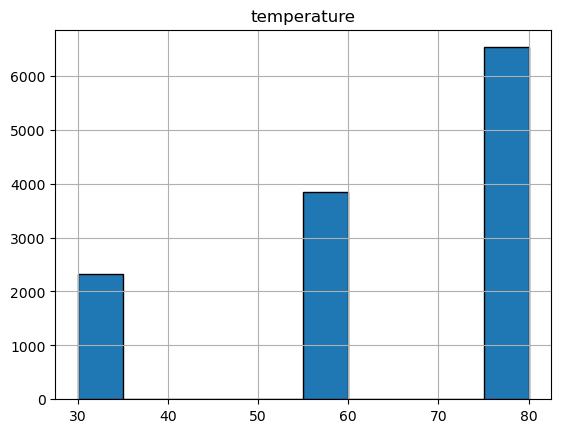

In [34]:
data.hist(column='temperature', bins=10, edgecolor='black')

**Investigating the Bar Coupons**

Now, we will lead you through an exploration of just the bar related coupons.  

1. Create a new `DataFrame` that contains just the bar coupons.


In [73]:
bar_coupons = data.query('coupon == "Bar"').copy()
bar_coupons_total = len(bar_coupons)

2. What proportion of bar coupons were accepted?


In [74]:
bar_coupons_accpt_rate = bar_coupons["Y"].mean()*100
print(f"Proportion of bar coupons were accepted: {bar_coupons_accpt_rate:.2f}%")

Proportion of bar coupons were accepted: 41.00%


3. Compare the acceptance rate between those who went to a bar 3 or fewer times a month to those who went more.


In [75]:
more_trips = ["gt8","4~8"]
fewer_trips = ["never","less1","1~3"]

bar_more_trips_accpt_rate = bar_coupons.query('Bar in @more_trips')["Y"].mean()*100
bar_fewer_trips_accpt_rate = bar_coupons.query('Bar in @fewer_trips')["Y"].mean()*100
print(f"Acceptance rate for Drivers who went to bar 3 or more times: {bar_more_trips_accpt_rate:.2f}%")
print(f"Acceptance rate for Drivers who went to fewer trips to bar: {bar_fewer_trips_accpt_rate:.2f}%")
accpt_rate_byfreq = abs(bar_more_trips_accpt_rate - bar_fewer_trips_accpt_rate)
print(f"Comparison between those who went to a bar 3 or fewer times a month to those who went more {accpt_rate_byfreq:.2f}%")

Acceptance rate for Drivers who went to bar 3 or more times: 76.88%
Acceptance rate for Drivers who went to fewer trips to bar: 37.06%
Comparison between those who went to a bar 3 or fewer times a month to those who went more 39.82%


4. Compare the acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others.  Is there a difference?


In [78]:
bar_trips = ["1~3","4~8","gt8"]
bar_coupons.loc[bar_coupons['age'] == '50plus', 'age'] = 50
bar_coupons.loc[bar_coupons['age'] == 'below21', 'age'] = 20
bar_coupons.loc[:,'age'] = pd.to_numeric(bar_coupons['age'])

bar_accpt_rate_by_trips_age = bar_coupons.query('age > 25 and Bar in @bar_trips')["Y"].mean()*100
bar_accpt_rate = bar_coupons["Y"].mean()*100
accpt_rate_by_trips_age = abs(bar_accpt_rate - bar_accpt_rate_by_trips_age)
print(f"Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: {bar_accpt_rate_by_trips_age:.2f}%")
print(f"Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: {accpt_rate_by_trips_age:.2f}%")

Acceptance rate of drivers who go to a bar more than once a month and are over the age of 25: 69.52%
Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: 28.52%


5. Use the same process to compare the acceptance rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry.


In [77]:
bar_psgr_job_rate = bar_coupons.query('occupation != "Farming Fishing & Forestry" and passanger != "Kid(s)" and Bar in @bar_trips')["Y"].mean()*100
print(f"Driver who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {bar_psgr_job_rate:.2f}%")
comp_accpt_rate_by_psgr_job_trips = abs(bar_psgr_job_rate - bar_accpt_rate)
print(f"Acceptance  rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: {comp_accpt_rate_by_psgr_job_trips:.2f}%") 

Driver who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 71.32%
Acceptance  rate between drivers who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: 30.32%


6. Compare the acceptance rates between those drivers who:

- go to bars more than once a month, had passengers that were not a kid, and were not widowed *OR*
- go to bars more than once a month and are under the age of 30 *OR*
- go to cheap restaurants more than 4 times a month and income is less than 50K.



In [69]:
bar_coupons.loc[:,'income'] = bar_coupons['income'].astype('str').str.split(' - ', n=1).str[-1].str.replace('$', '').str.replace('or More','').str.replace('Less than','')
bar_coupons.loc[:,'income'] = pd.to_numeric(bar_coupons['income'])

accpt_rate_by_multi_condition = bar_coupons.query(
    ('Bar in @bar_trips and passanger != "Kid(s)" and maritalStatus != "Widowed"') or
    ('Bar in @bar_trips and age < 30') or
    ('RestaurantLessThan20 in @more_trips and income < 50000'))["Y"].mean()*100

comp_accpt_rate_by_multi_condition = abs(accpt_rate_by_multi_condition - bar_accpt_rate)
print(f"Acceptance rate with multiple conditions {comp_accpt_rate_by_multi_condition:.2f}%")

Acceptance rate with multiple conditions 30.32%


7.  Based on these observations, what do you hypothesize about drivers who accepted the bar coupons?

## Hypothesis about drivers who accepted the bar coupons:
1. Acceptance rate for Drivers who went to bar 3 or more times: **76.88%**
2. Acceptance rate for Drivers who went to fewer trips to bar: **37.06%**
3. Comparison between those who went to a bar 3 or fewer times a month to those who went more **39.82%**
4. Acceptance rate between drivers who go to a bar more than once a month and are over the age of 25 to the all others: **28.52%**
5. **69.52%** of the drivers who go to a bar more than once a month and are over the age of 25 accepted the coupons. 
6. Driver who go to bars more than once a month and had passengers that were not a kid and had occupations other than farming, fishing, or forestry: **71.32%**
7. Acceptance rate for drivers with below conditions: **30.32%**
    * go to bars more than once a month, had passengers that were not a kid, and were not widowed OR
    * go to bars more than once a month and are under the age of 30 OR
    * go to cheap restaurants more than 4 times a month and income is less than 50K.

### Independent Investigation

Using the bar coupon example as motivation, you are to explore one of the other coupon groups and try to determine the characteristics of passengers who accept the coupons.  

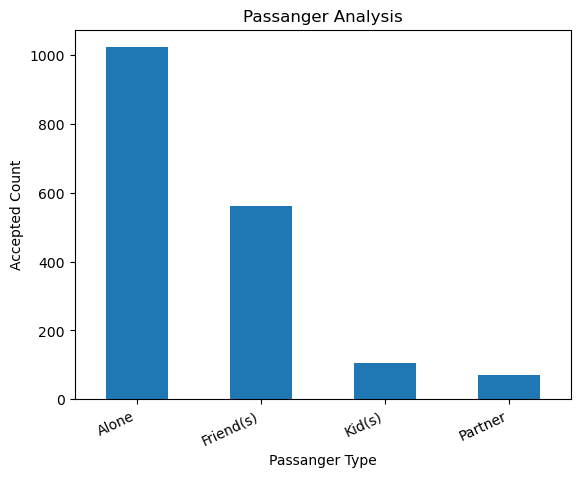

In [25]:
ct_coupons_accepted = data.query('coupon == "Carry out & Take away" and Y == 1')
ct_passanger_freq = ct_coupons_accepted["passanger"].value_counts()
ct_passanger_freq.plot.bar(title='Passanger Analysis')
plt.xlabel('Passanger Type')
plt.ylabel('Accepted Count')
plt.xticks(rotation=25, ha='right')
plt.savefig("images/ct_analysis.png", bbox_inches='tight')
plt.show()

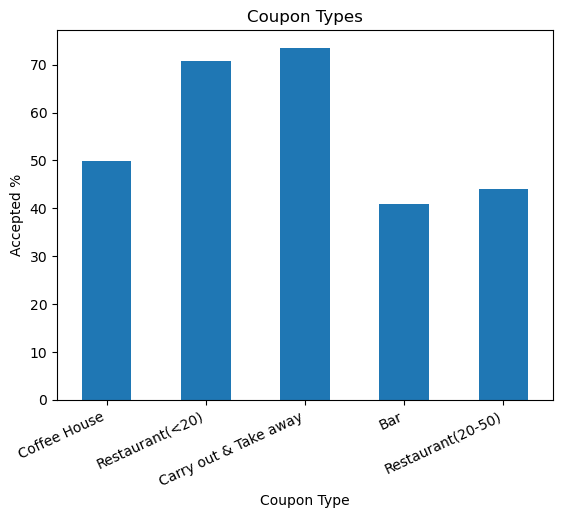

In [22]:
overall_coupons_accptd = data.query('Y == 1')['coupon'].value_counts()
overall_coupons_accptd_pct = (overall_coupons_accptd/coupon_freq)*100
overall_coupons_accptd_pct.plot.bar(title='Coupon Types')
plt.xlabel('Coupon Type')
plt.ylabel('Accepted %')
plt.xticks(rotation=25, ha='right')
plt.savefig("images/overall_analysis1.png", bbox_inches='tight')
plt.show()